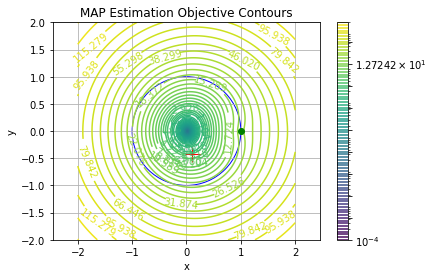

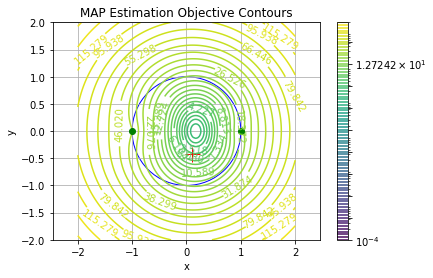

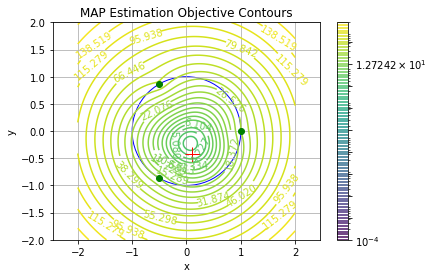

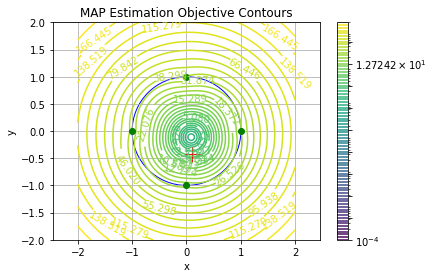

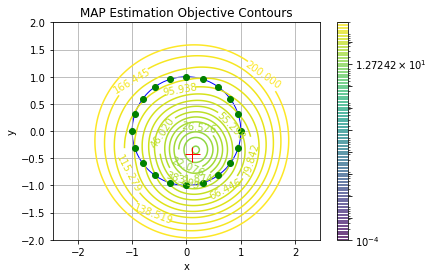

In [9]:
# The provided Python code below generates and plots equilevel contours of the MAP estimation objective function
# for a vehicle's position based on noisy range measurements to K landmarks.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Set data
SIGMA_X = 0.25
SIGMA_Y = 0.25
SIGMA_I = 0.3
CONTOUR_LEVELS = np.geomspace(0.0001, 200, 80)

# Get a random xy pair within the unit circle centered at the origin.
def random_unitcircle_loc():
    r = np.sqrt(np.random.uniform(0, 1))
    theta = np.random.uniform(0, 2 * np.pi)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.array([x, y])

# Get the xy coordinate pair of the i'th landmark out of K total landmarks.
def landmark_loc(i, K):
    angle = 2 * np.pi / K * i
    x = np.cos(angle)
    y = np.sin(angle)
    return np.array([x, y])

# Generates a range measurement between the given landmark and true positions,
# with random Gaussian noise.
def generate_measurement(xy_landmark, xy_true):
    dTi = np.linalg.norm(xy_true - xy_landmark)
    noise = np.random.normal(0, SIGMA_I)
    measurement = dTi + noise
    return max(measurement, 0)

# Generates noisy measurements for all K landmarks given the true position.
def get_range_measurements(K, xy_true):
    return [generate_measurement(landmark_loc(i, K), xy_true) for i in range(K)]

# Creates an equilevel contour plot for the MAP estimation objective function
# given a set of range measurements.
def plot_equilevels(range_measurements, xy_true):
    x = np.linspace(-2, 2, 128)
    y = np.linspace(-2, 2, 128)
    X, Y = np.meshgrid(x, y)
    Z = MAP_objective(np.vstack((X.ravel(), Y.ravel())).T, range_measurements).reshape(X.shape)

    fig, ax = plt.subplots()
    unit_circle = plt.Circle((0, 0), 1, color='blue', fill=False)
    ax.add_patch(unit_circle)

    CS = ax.contour(X, Y, Z, levels=CONTOUR_LEVELS, norm=LogNorm())
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('MAP Estimation Objective Contours')

    # Plot the true position and landmarks
    ax.plot(xy_true[0], xy_true[1], 'r+', markersize=15)
    for i in range(len(range_measurements)):
        landmark = landmark_loc(i, len(range_measurements))
        ax.plot(landmark[0], landmark[1], 'go')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.colorbar(CS)
    plt.axis('equal')
    plt.show()

# Calculates values of the MAP estimation objective function on a given mesh grid of input x-y coordinate pairs.
def MAP_objective(xy, range_measurements):
    prior_contrib = np.sum((xy / [SIGMA_X, SIGMA_Y]) ** 2, axis=1)
    likelihood_contrib = 0
    for i, r_i in enumerate(range_measurements):
        d_i = np.linalg.norm(xy - landmark_loc(i, len(range_measurements)), axis=1)
        likelihood_contrib += ((r_i - d_i) ** 2) / (2 * SIGMA_I ** 2)
    return prior_contrib + likelihood_contrib

# Generate the true vehicle location and range measurements
xy_true = random_unitcircle_loc()

# Plot the equilevel contours for different K values
for K in [1, 2, 3, 4, 20]:
    range_measurements = get_range_measurements(K, xy_true)
    plot_equilevels(range_measurements, xy_true)
